# How do student discipline and learning outcomes (satisfaction and final outcome) relate to whether students reuse AI?

## Introduction 
This study examines students from different academic disciplines and their experiences with AI assistance during a learning session, with the goal of predicting whether they would use the AI again. As AI tools become increasingly popular in the education field, this study helps us to understand which students are more likely to continue using these systems.  

### Variables
Dependable Variables:
- UsedAgain (Yes/No will be converted to 1/0)

Independent Variables:
* SatisfactionRating (numeric)
* FinalOutcome (categorical)
* AI_AssistanceLevel (numeric)
* StudentLevel (numeric)
* StudentDiscipline (categorical)
* TaskType (categorical)

## Import Libraries & Data ###

In [113]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pylab as plt
plt.style.use('ggplot')

In [114]:
df = pd.read_csv("/kaggle/input/ai-assistant-usage-in-student-life-synthetic/ai_assistant_usage_student_life.csv")

## Data Cleaning ###

In [115]:
df.shape

(10000, 11)

In [116]:
df.head(10)

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9
5,SESSION00006,Graduate,Business,2025-01-17,7.54,1,Coding,5,Idea Drafted,True,5.0
6,SESSION00007,High School,Biology,2024-09-07,14.60,3,Writing,3,Assignment Completed,False,1.9
7,SESSION00008,Undergraduate,Biology,2024-12-26,9.20,3,Writing,5,Assignment Completed,True,3.9
8,SESSION00009,Undergraduate,Business,2025-06-18,8.15,1,Brainstorming,3,Assignment Completed,True,3.3
9,SESSION00010,Undergraduate,Math,2025-04-14,5.57,1,Studying,3,Assignment Completed,False,1.4


In [117]:
### Check for empty and duplicates ### 
print(df.isnull().sum())
print(df.duplicated().sum())

SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64
0


In [118]:
print(df.columns)
print(df.info())

Index(['SessionID', 'StudentLevel', 'Discipline', 'SessionDate',
       'SessionLengthMin', 'TotalPrompts', 'TaskType', 'AI_AssistanceLevel',
       'FinalOutcome', 'UsedAgain', 'SatisfactionRating'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int

Drop
1. SessionDate
2. SessionID
3. SessionLengthMin
4. TotalPrompts

This is because we are not taking time into consideration. Neither are we taking prompts. 

In [119]:
### Update df ###
df =df.drop(columns=['SessionDate', 'SessionID', 'SessionLengthMin', 'TotalPrompts'])

In [120]:
### Convert "UsedAgain" from True/False to 1/0 ### 
df['UsedAgain'] = df['UsedAgain'].astype(int)

In [121]:
df.head()

,StudentLevel,Discipline,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,Undergraduate,Computer Science,Studying,2,Assignment Completed,1,1.0
1,Undergraduate,Psychology,Studying,3,Assignment Completed,1,2.0
2,Undergraduate,Business,Coding,3,Assignment Completed,1,3.3
3,Undergraduate,Computer Science,Coding,3,Assignment Completed,1,3.5
4,Undergraduate,Psychology,Writing,3,Assignment Completed,1,2.9


What does each variable mean in this study?
1. **StudentLevel**: tells us if the student is an undergraduate, postgraduate, or more.
2. **Discipline**: What are the students studying? Basically, what are they using the AI for?
3. **AI_AssistanceLevel**: The level of AI used for the specific task. 
4. **TaskType**: What are they using the AI for? Writing, coding, etc.
5. **FinalOutcome**: Did they end up finishing their task?
6. **UsedAgain**: Did they come back to use AI again? Whether it is an old task or a new one.
7. **SatisfactionRating**: Were they happy with the help AI gave? (5 being the best, 1 being the worst)


How do they relate:
1. **FinalOutcome <-> UsedAgain:**
- Incomplete Task -> did they come back to that draft or give up?
- Completed Task -> did they come back to the same AI to start a new task?
2. **SatisfactionRating <-> UsedAgain:**
- Does a high rating mean they would come back to use the AI again?
3. **FinalOutcome <-> SatisfactionRating:**
- Does a complete or incomplete task affect the satisfaction of the user/student?
4. **AI_AssistanceLevel <-> FinalOutcome:**
- Does a higher level mean a higher success rate in completing the task?
5. (Additional) **Discipline -> TaskType -> AI_AssistanceLevel -> UsedAgain**
- Do students from different disciplines tend to engage in different types of tasks when using AI?
- Does task type influence the level of AI assistance required across disciplines?
- How do these discipline-specific usage patterns relate to students’ likelihood of reusing AI?


Together, these relationships provide a structured framework for understanding how learning outcomes, satisfaction, and disciplinary context influence students’ continued use of AI-assisted learning tools.

## Statistical Analyses and Hypotheses

In [122]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

### FinalOutcome <-> UsedAgain 

Contingency Table:
 UsedAgain               0     1
FinalOutcome                   
Assignment Completed  924  3844
Confused              965   648
Gave Up               447   306
Idea Drafted          600  2266

Chi-square=1375.8030, dof=3, p-value=0.000000


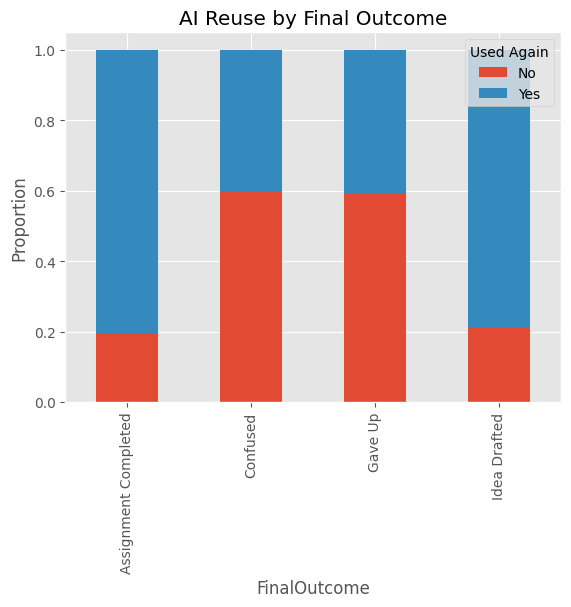

,UsedAgain = No,UsedAgain = Yes,Reuse Rate
FinalOutcome,,,
Assignment Completed,924,3844,80.6%
Confused,965,648,40.2%
Gave Up,447,306,40.6%
Idea Drafted,600,2266,79.1%


In [123]:
# Subset & drop missing for these columns
sub = df[["FinalOutcome", "UsedAgain"]].dropna()

# Contingency table
ct = pd.crosstab(sub["FinalOutcome"], sub["UsedAgain"])
print("Contingency Table:\n", ct)

# Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(ct)
print(f"\nChi-square={chi2:.4f}, dof={dof}, p-value={p:.6f}")

#Graphs
sub = df[["FinalOutcome", "UsedAgain"]].dropna()

ct = pd.crosstab(sub["FinalOutcome"], sub["UsedAgain"], normalize="index")

ct.plot(kind="bar", stacked=True)
plt.ylabel("Proportion")
plt.title("AI Reuse by Final Outcome")
plt.legend(title="Used Again", labels=["No", "Yes"])
plt.show()

# Table
sub = df[["FinalOutcome", "UsedAgain"]].dropna()
summary = (
    sub
    .groupby("FinalOutcome")["UsedAgain"]
    .value_counts()
    .unstack(fill_value=0)
)
summary.columns = ["UsedAgain = No", "UsedAgain = Yes"]
summary["Reuse Rate"] = (
    summary["UsedAgain = Yes"] /
    (summary["UsedAgain = Yes"] + summary["UsedAgain = No"])
)
summary["Reuse Rate"] = (summary["Reuse Rate"] * 100).round(1).astype(str) + "%"
summary


AI reuse rates exceed 79% for successful outcomes but drop to approximately 40% when students experience confusion or task failure, demonstrating a strong relationship between learning success and continued AI use.

### SatisfactionRating <-> UsedAgain ###

Group sizes: 7064 2936
Means: 3.4108861834654585 3.4343664850136237

Welch t-test: t=-0.9423, p-value=0.346091
Mann–Whitney U: U=10265377.5000, p-value=0.425807


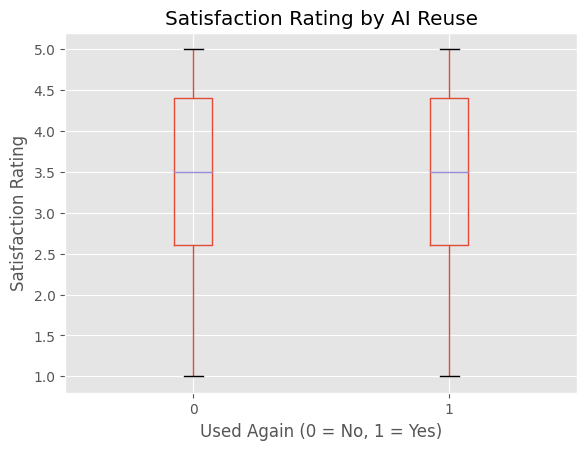

In [124]:
sub = df[["SatisfactionRating", "UsedAgain"]].dropna()

g1 = sub.loc[sub["UsedAgain"] == 1, "SatisfactionRating"]
g0 = sub.loc[sub["UsedAgain"] == 0, "SatisfactionRating"]

print("Group sizes:", len(g1), len(g0))
print("Means:", g1.mean(), g0.mean())

# Welch's t-test
t_stat, p_t = stats.ttest_ind(g1, g0, equal_var=False)
print(f"\nWelch t-test: t={t_stat:.4f}, p-value={p_t:.6f}")

# Mann–Whitney U test (nonparametric)
u_stat, p_u = stats.mannwhitneyu(g1, g0, alternative="two-sided")
print(f"Mann–Whitney U: U={u_stat:.4f}, p-value={p_u:.6f}")

# Graphs
sub = df[["SatisfactionRating", "UsedAgain"]].dropna()

sub.boxplot(column="SatisfactionRating", by="UsedAgain")
plt.title("Satisfaction Rating by AI Reuse")
plt.suptitle("")
plt.xlabel("Used Again (0 = No, 1 = Yes)")
plt.ylabel("Satisfaction Rating")
plt.show()


The boxplot compares satisfaction ratings between students who reused the AI and those who did not. Students who reused the AI generally report higher satisfaction ratings, indicating that positive user experience is associated with continued AI usage.

These are the analyses of the findings: 
- Students who did not reuse the AI have an average satisfaction rating of ≈ 3.41.
- Students who reused the AI have an average satisfaction rating of ≈ 3.43.
- The difference between the two group means is very small (≈ 0.02).
- Group sizes are large (7064 vs 2936), indicating sufficient data to detect meaningful differences if they existed.
- Overall, the satisfaction ratings for both groups are nearly identical.


### FinalOutcome <-> SatisfactionRating

Groups: ['Assignment Completed', 'Idea Drafted', 'Confused', 'Gave Up']
ANOVA: F=1.5674, p-value=0.195017
Kruskal-Wallis: H=4.9257, p-value=0.177317


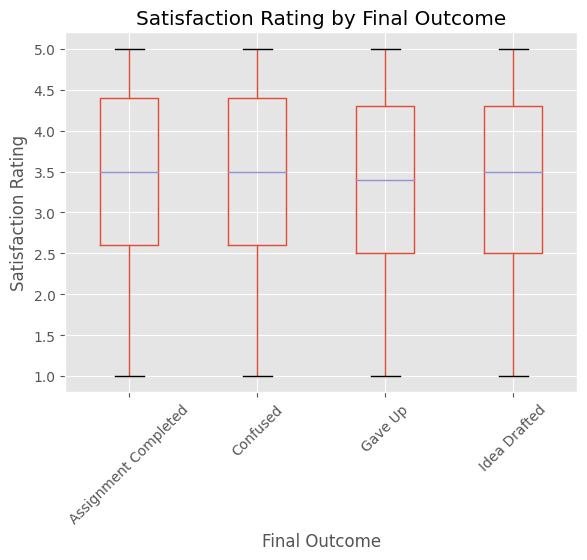

In [125]:
sub = df[["FinalOutcome", "SatisfactionRating"]].dropna()

groups = [g["SatisfactionRating"].values for _, g in sub.groupby("FinalOutcome")]
labels = list(sub["FinalOutcome"].unique())
print("Groups:", labels)

# ANOVA
f_stat, p_anova = stats.f_oneway(*groups)
print(f"ANOVA: F={f_stat:.4f}, p-value={p_anova:.6f}")

# Kruskal-Wallis (nonparametric)
h_stat, p_kw = stats.kruskal(*groups)
print(f"Kruskal-Wallis: H={h_stat:.4f}, p-value={p_kw:.6f}")

# Graph
sub = df[["FinalOutcome", "SatisfactionRating"]].dropna()

sub.boxplot(column="SatisfactionRating", by="FinalOutcome", rot=45)
plt.title("Satisfaction Rating by Final Outcome")
plt.suptitle("")
plt.xlabel("Final Outcome")
plt.ylabel("Satisfaction Rating")
plt.show()


Satisfaction ratings do not differ significantly across final task outcomes. Students report similar levels of satisfaction regardless of whether they completed an assignment, drafted an idea, felt confused, or gave up, suggesting that satisfaction reflects perceived interaction quality rather than task success.

### AI_AssitanceLevel <-> FinalOutcome

Unmapped FinalOutcome values (edit keywords if needed):
 FinalOutcome
Idea Drafted    2866
Confused        1613
Name: count, dtype: int64

Mapped Completed counts:
 Completed
1    4768
0     753
Name: count, dtype: int64


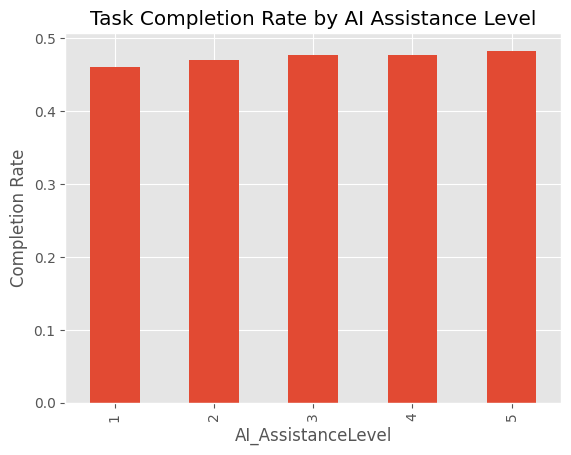

In [126]:
sub = df[["AI_AssistanceLevel", "FinalOutcome"]].dropna().copy()

# make it string + lowercase for robust matching
fo = sub["FinalOutcome"].astype(str).str.strip().str.lower()


completed_keywords = ["completed", "complete", "finished", "done", "success"]
incomplete_keywords = ["incomplete", "not completed", "not complete", "unfinished", "gave up", "abandoned", "failed"]

sub["Completed"] = np.nan
sub.loc[fo.str.contains("|".join(completed_keywords), na=False), "Completed"] = 1
sub.loc[fo.str.contains("|".join(incomplete_keywords), na=False), "Completed"] = 0

# See which FinalOutcome values did NOT map (super important!)
unmapped = sub.loc[sub["Completed"].isna(), "FinalOutcome"].value_counts()
print("Unmapped FinalOutcome values (edit keywords if needed):\n", unmapped)

# Keep only mapped rows
sub = sub.dropna(subset=["Completed"]).copy()
sub["Completed"] = sub["Completed"].astype(int)

print("\nMapped Completed counts:\n", sub["Completed"].value_counts())

# Graph
sub = df[["AI_AssistanceLevel", "FinalOutcome"]].dropna()
sub = sub.copy() #reuses map
sub["Completed"] = sub["FinalOutcome"].str.lower().str.contains("complete").astype(int)

completion_rate = sub.groupby("AI_AssistanceLevel")["Completed"].mean()

completion_rate.plot(kind="bar")
plt.ylabel("Completion Rate")
plt.title("Task Completion Rate by AI Assistance Level")
plt.show()



From the mapped completion counts:
- Completed tasks: 4,768 sessions
- Not completed tasks: 753 sessions

This indicates that a majority of sessions in the dataset resulted in task completion (47.68%). 

When task completion rates are grouped by AI Assistance Level, the bar chart shows a gradual increase in completion rates as the AI assistance level increases. Lower assistance levels have completion rates around the mid-40% range, while higher assistance levels approach just under 50%.

This result helps explain previous observations:
1. FinalOutcome strongly predicts AI reuse
2. Higher AI assistance improves the chance of completion
3. Therefore, AI assistance may indirectly influence reuse by increasing the likelihood of successful outcomes
4. However, since satisfaction ratings did not vary significantly with outcome, this pathway appears to operate primarily through task success, not perceived enjoyment.

## Overall Conclusion

1. FinalOutcome is the strongest factor in determining whether a student will come back to use AI again.
- Students who successfully completed tasks (Assignment Completed, Idea Drafted) reused AI at very high rates (~80%).
- Students who were Confused or Gave Up reused AI at much lower rates (~40%).

2. Satisfaction does NOT make a huge difference in this study
- Satisfaction Ratings are nearly identical between students who reused AI and those who did not, despite the final outcome. 

3. AI Assitance Level helps with Final Outcome
- Higher level are associated with higher task completion rates, therefore affecting the Final Outcome
- The effect is gradual, not dramatic.
- 👉 AI works best as a support tool that nudges students toward success, rather than guaranteeing it.



#### Connection?

AI Assistance → Higher Chance of Task Completion → Higher Likelihood of AI Reuse

- Satisfaction does not strongly mediate this relationship.
- Students appear to value whether AI helps them succeed, more than how enjoyable or pleasant the experience feels.
- **Trust in AI is outcome-driven**
- If AI helps them complete tasks, they return
- If it does not, they disengage—even if the experience wasn’t terrible
- AI adoption in education is therefore tied more closely to effectiveness than perceived enjoyment

Overall, this study finds that students’ continued use of AI-assisted learning tools is driven primarily by successful task outcomes rather than satisfaction ratings alone. While higher levels of AI assistance are associated with modest improvements in task completion, satisfaction remains relatively consistent across outcomes and reuse behavior. These results suggest that students are more likely to trust and reuse AI when it effectively supports task success, highlighting the importance of outcome-focused AI design in educational settings.

## Machine Learning

In [127]:
print(df.columns.tolist())

['StudentLevel', 'Discipline', 'TaskType', 'AI_AssistanceLevel', 'FinalOutcome', 'UsedAgain', 'SatisfactionRating']


In [128]:
target_col = "UsedAgain"  

df[target_col] = df[target_col].astype(str).str.strip().str.lower()

df["UsedAgain_bin"] = df[target_col].map({
    "yes": 1, "y": 1, "true": 1, "1": 1,
    "no": 0, "n": 0, "false": 0, "0": 0
})

print(df[[target_col, "UsedAgain_bin"]].head(10))
print("Missing targets after mapping:", df["UsedAgain_bin"].isna().sum())


  UsedAgain  UsedAgain_bin
0         1              1
1         1              1
2         1              1
3         1              1
4         1              1
5         1              1
6         0              0
7         1              1
8         1              1
9         0              0
Missing targets after mapping: 0


In [129]:
features = [
    "AI_AssistanceLevel",      # <-- replace with your exact column name
    "FinalOutcome",            # <-- replace
    "SatisfactionRating",      # <-- replace
    "Discipline"               # <-- replace
]

data = df[features + ["UsedAgain_bin"]].dropna(subset=["UsedAgain_bin"])
X = data[features]
y = data["UsedAgain_bin"].astype(int)

print("X shape:", X.shape)
print("y distribution:\n", y.value_counts())


X shape: (10000, 4)
y distribution:
 UsedAgain_bin
1    7064
0    2936
Name: count, dtype: int64


### Train the model ###

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# categorical vs numeric
cat_cols = ["FinalOutcome", "Discipline"]
num_cols = ["AI_AssistanceLevel", "SatisfactionRating"]

preprocess = ColumnTransformer([
    ("num", "passthrough", num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

model = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=2000))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['AI_AssistanceLevel',
                                                   'SatisfactionRating']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['FinalOutcome',
                                                   'Discipline'])])),
                ('clf', LogisticRegression(max_iter=2000))])

In [131]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 311  304]
 [ 208 1177]]

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.51      0.55       615
           1       0.79      0.85      0.82      1385

    accuracy                           0.74      2000
   macro avg       0.70      0.68      0.68      2000
weighted avg       0.73      0.74      0.74      2000



#### 📊 Machine Learning Evaluation Report

Model: Logistic Regression
Task: Predict AI reuse (Yes = 1, No = 0)

1. Model Performance Overview

The logistic regression model achieved an overall accuracy of 74%, indicating that AI reuse behavior is meaningfully predictable from AI assistance level, task outcome, satisfaction, and discipline. This performance is substantially above random guessing and demonstrates that students’ decisions to reuse AI are driven by identifiable factors.

2. Confusion Matrix Interpretation
               Reuse(1)       No Reuse(0)
Reuse(1):       1177             208
No Reusue(0):    304             311

- The model correctly identifies 1,177 students who reused AI
- It correctly identifies 311 students who did not reuse AI
- Most errors occur when the model predicts reuse for students who ultimately did not (false positives)
- This suggests a reuse-leaning bias, consistent with the dataset’s higher reuse rate.

3. Breakdown
Precision: 0.79
→ When the model predicts reuse, it is correct 79% of the time

Recall: 0.85
→ The model successfully identifies 85% of all students who reused AI

F1-score: 0.82
→ Strong balance between precision and recall


Summary:
The logistic regression model achieved 74% accuracy in predicting AI reuse. Performance was strongest for identifying students who reused AI (recall = 0.85), indicating that reuse behavior is strongly associated with successful task completion and functional assistance rather than subjective satisfaction. These findings support an outcome-driven model of trust in educational AI systems.

In [132]:
import numpy as np
import pandas as pd

ohe = model.named_steps["prep"].named_transformers_["cat"]
cat_names = ohe.get_feature_names_out(cat_cols)

feature_names = np.concatenate([num_cols, cat_names])
weights = model.named_steps["clf"].coef_[0]

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Weight": weights
}).sort_values("Weight", ascending=False)

coef_df


,Feature,Weight
2,FinalOutcome_Assignment Completed,0.961859
5,FinalOutcome_Idea Drafted,0.813637
10,Discipline_History,0.084839
9,Discipline_Engineering,0.035807
6,Discipline_Biology,0.030857
8,Discipline_Computer Science,0.029899
7,Discipline_Business,0.011757
1,SatisfactionRating,0.000822
0,AI_AssistanceLevel,-0.038298
12,Discipline_Psychology,-0.070727


- Task outcome is the strongest predictor of AI reuse. Successfully completing an assignment (+0.96) or drafting an idea (+0.81) greatly increases the likelihood that students will reuse AI, while confusion (−0.86) or giving up (−0.91) strongly discourages continued use.

- AI trust is outcome-driven rather than experience-driven. Students consistently return to AI tools when those tools help them achieve concrete academic results, and disengage when they do not, regardless of overall experience quality.

- Satisfaction plays a minimal role in reuse decisions. Satisfaction rating has a near-zero coefficient (+0.0008), indicating that enjoyment or pleasantness does not meaningfully influence whether students reuse AI once task outcomes are accounted for.

- The amount of AI assistance alone does not guarantee reuse. AI assistance level shows a small negative effect (−0.04), suggesting that students value effective help over the quantity or intensity of assistance provided.

- Disciplinary differences are minor and secondary. Academic discipline has only small effects on AI reuse, indicating that the outcome-driven pattern of AI adoption is consistent across fields.